# Linear regression

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    
    # ----- Params -----

    m = 0
    b = 0
    µ = 0
    Σ = []

    α = 1
    ß = 1
    λ = 1

    wµ = 0
    wΣ = 0

    # Fit params
    w_ML = []
    w_MAP = []


    # Constructor
    def __init__(self, m, b, µ, Σ, α=1, ß=1):
        self.m = m
        self.b = b
        self.µ = µ
        self.Σ = Σ
        self.α = α
        self.ß = ß
        self.λ = self.α / self.ß



    # ----- Data generation -----

    # Linear function
    def linear_function(self, x):
        return self.m * x + self.b
    
    # Generate data
    def sample(self, min, max, N):
        '''Sample data fitting the given linear function.\n
           [min, max]: The limits of the interval from which the data is sampled.\n
           N: number of samples
        '''
        x = np.linspace(min, max, N)
        y = self.linear_function(x) + np.random.normal(self.μ, self.Σ, N)
        return np.vstack([x,y]).T
    


    # ----- Maximum Likelyhood -----

    # ML (Maximum likelihood) fit
    def fit_ML(self, X, y):
        Φ = np.vstack([np.ones(len(X)), X]).T
        self.w_ML = np.linalg.solve(Φ.T @ Φ, Φ.T @ y)

    # ML (Maximum likelihood) estimate
    def predict_ML(self, X):
        Φ = np.vstack([np.ones(len(X)), X]).T
        return Φ @ self.w_ML



    # ----- Maximum A Posteriori -----
    
    # MAP (Maximum A Posteriori) fit
    def fit_MAP(self, X, y):
        Φ = np.vstack([np.ones(len(X)), X]).T
        I = np.identity(2)
        self.w_MAP = np.linalg.solve(Φ.T @ Φ + self.λ * I, Φ.T @ y)

    # MAP (Maximum A Posteriori) estimate
    def predict_MAP(self, X):
        Φ = np.vstack([np.ones(len(X)), X]).T
        return Φ @ self.w_MAP
    


    # ----- Bayesian Linear Regression
    
    # w posterior
    def w_posterior(self, X, y):
        Φ = np.vstack([np.ones(len(X)), X]).T
        I = np.identity(2)
        self.wΣ = self.ß * Φ.T @ Φ + self.α * I
        self.wμ = pow(self.wΣ, -1) @ (self.ß * Φ.T @ y)

    # Bayesian predict
    def bayesian_predict(self, X, y):
        Φ = np.vstack([np.ones(len(X)), X])
        self.w_posterior(X,y)
        return self.wΣ @ Φ, self.wμ @ Φ



    # ----- Plot -----

    # Scatter
    def scatter(self, data):
        plt.scatter(data[:,0], data[:,1], c='black')

    # Plot function
    def plot_function(self, axis):
        plt.plot(axis, self.linear_function(axis), c='grey', linestyle='--', label='{}x + {}'.format(self.m, self.b))
        plt.legend()

    # Plot predict results
    def plot_prediction(self, axis, pred, method, color):
        plt.plot(axis, pred, label=f'$w_{method}^T$ φ(x)', c=color)
        plt.legend()


In [3]:
linreg = LinearRegression(0.5, 2, 0, 0.3, 1, 1)
data = linreg.sample(0,5,50)

linreg.fit_ML(data[:,0], data[:,1])
y_ML = linreg.predict_ML(data[:,0])

linreg.fit_MAP(data[:,0], data[:,1])
y_MAP = linreg.predict_MAP(data[:,0])

blr_Σ, blr_μ = linreg.bayesian_predict(data[:,0], data[:,1])

fig = plt.figure(figsize=(9,7))
fig.suptitle('Generated data')
plt.title('ML: w={}, b={}\n MAP: w={}, b={}'.format(linreg.w_ML[0], linreg.w_ML[1], linreg.w_MAP[0], linreg.w_MAP[1]))
linreg.scatter(data)
linreg.plot_function(data[:,0])
linreg.plot_prediction(data[:,0], y_ML, 'ML', 'cornflowerblue')
linreg.plot_prediction(data[:,0], y_MAP, 'MAP', 'indigo')

Error in callback <function _draw_all_if_interactive at 0x00000243ADAB8EA0> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'$w_ML^T$ \\u03c6(x)'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp97l1k5m5 f72692a03a3d3a5bea0155f969acbd5d.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 23.4) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(f72692a03a3d3a5bea0155f969acbd5d.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-03-30>
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))

(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore.s
ty) (C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def)
No file f72692a03a3d3a5bea0155f969acbd5d.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character φ (U+03C6)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily $w_ML^T$ φ
                           (x)}%
No pages of output.
Transcript written on C:\Users\patri\.matplotlib\tex.cache\f7\26\tmp97l1k5m5\f7
2692a03a3d3a5bea0155f969acbd5d.log.




RuntimeError: latex was not able to process the following string:
b'$w_ML^T$ \\u03c6(x)'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmprozcs_gy f72692a03a3d3a5bea0155f969acbd5d.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 23.4) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(f72692a03a3d3a5bea0155f969acbd5d.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-03-30>
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))

(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore.s
ty) (C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\patri\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def)
No file f72692a03a3d3a5bea0155f969acbd5d.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character φ (U+03C6)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\sffamily $w_ML^T$ φ
                           (x)}%
No pages of output.
Transcript written on C:\Users\patri\.matplotlib\tex.cache\f7\26\tmprozcs_gy\f7
2692a03a3d3a5bea0155f969acbd5d.log.




<Figure size 900x700 with 1 Axes>

## Bayesian Regression

[[ 258. 1275.]
 [1275. 8588.]]
[26.9236808   4.64611392]


Text(0.5, 1.0, 'w:   b = 4.21904, m = 1.583')

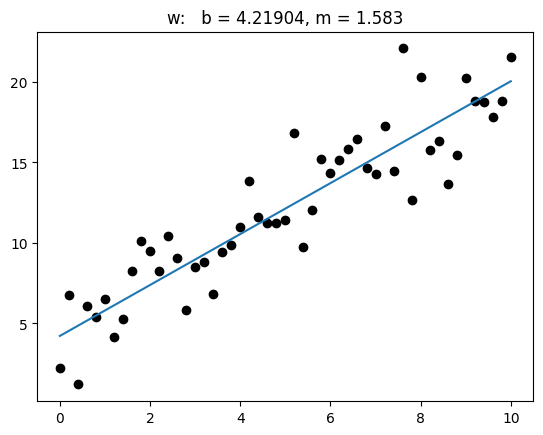

In [24]:
# w calculation prep
Φ = np.vstack([np.ones(N), x]).T
α = 3
ß = 5
λ = α / ß
I = np.identity(2)

# Calculate w MAP
w = np.linalg.solve(Φ.T @ Φ + λ * I, Φ.T @ y)

# w posterior
Σ = ß * Φ.T @ Φ + α * I
µ = pow(Σ, -1) @ (ß * Φ.T @ y)
print('µ= 'µ)
print('Σ= ', Σ)

# y MAP
y_linreg = Φ @ w

# Plot
plt.scatter(x,y,c='black')
plt.plot(x, y_linreg)
plt.title('w:   b = ' + str(np.round(w[0], 5)) + ', m = ' + str(np.round(w[1], 5)))